The notebook is dedicated to estimation of the effect of the imeersive interactive virtual reality game "Bogo" on the self-assemenent of the mood with SAM scales valaence, arosual and dominance. The scales are filled before the 10 minute virutal reality game and after it with paper and pensil form as shown in the schema:

In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import lines
import numpy as np

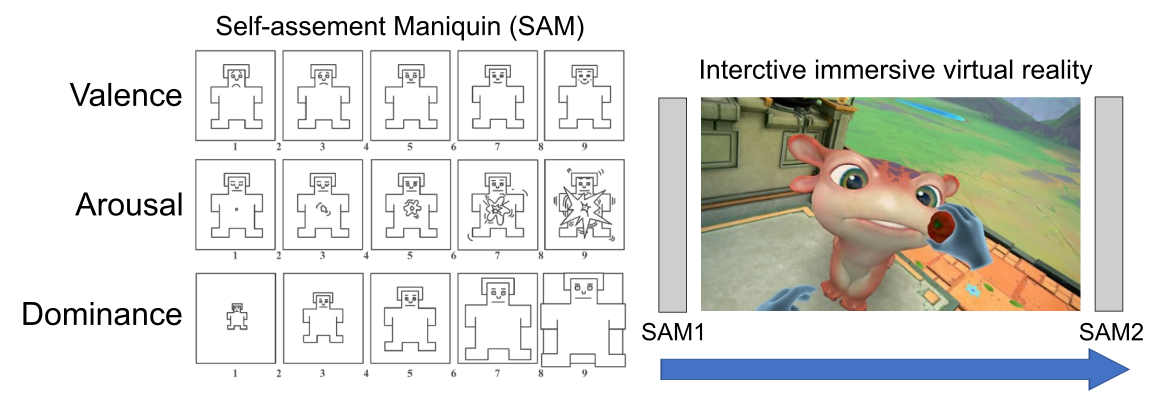

In [ ]:
# load SAM data form google drive into a scv file
url = "https://drive.google.com/file/d/13tlMcCdW3R3jBGVqFeCVu0YO69MqUNNL/view?usp=share_link"
output = "SAM.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

In [ ]:
# reqd data from the csv file
df = pd.read_csv('/content/SAM.csv' , delimiter=';')
df.head()

In [ ]:
# Convert data frame to nummpy to further use in plotting and stats
data = df.to_numpy()
# Get the list of all column names from headers
column_headers = list(df.columns.values)

In [ ]:
M=[]
S=[]
SEM=[]
CI= np.empty([2, 0])

# calcualtion statistical parametres
for i in range(1,6+1):
  M.append(np.mean(data[:,i])) # mean
  S.append(np.std(data[:,i])) # standard deviation
  SEM.append( S[i-1] / (L-1)**(1/2) ) # standard error
  CI1=np.array([[M[i-1] - SEM[i-1] * 2], [M[i-1] + SEM[i-1] * 2]])
  CI = np.append(CI, CI1, axis=1) # confidence intervals 95%

In [ ]:
# building figure with raw data and stats
L=data.shape[0] # Number of subjects
ss = np.arange(1, L+1)/L/2-0.25 # x coordintates for individual values
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 16})
for i in range(1,6+1):
  plt.plot(ss+i, data[:,i], 'ok', mfc = 'none', markersize = 8)
  plt.plot([-0.25+i, 0.25+i], [M[i-1], M[i-1]], 'b')
  plt.plot([i, i], CI[:, i-1,], 'r')
plt.xticks(range(1,6+1), column_headers[1:])
plt.title('SAM scores before and after BOGO game')
legend_elements = [lines.Line2D([0], [0], marker='o',  color='k', mfc = 'none', markersize = 8, linestyle='None', label='indiv. vals'),
                   lines.Line2D([0], [0], color='b', label='Mean'),
                   lines.Line2D([], [], color='r', marker='|', linestyle='None', markersize=20, markeredgewidth=1.5, label='CI 95%')]
plt.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.3 , 1.0))
plt.tight_layout()
plt.show()

In [ ]:
diff = np.empty([L, 0])
M_D=[]
S_D=[]
SEM_D=[]
CI_D = np.empty([2, 0])

# compute differences [after minus before]
for i in [1, 2, 3]:
  diff1 = data[:,i*2]-data[:,i*2-1]
  diff1=diff1.reshape(17,1)
  diff = np.append(diff, diff1, axis = 1)
  M_D.append(np.mean(diff[:,i-1])) # mean (of difference)
  S_D.append(np.std(diff[:,i-1])) # standard deviation
  SEM_D.append( S_D[i-1] / (L-1)**(1/2) ) # standard error
  CI1=np.array([[M_D[i-1] - SEM_D[i-1] * 2], [M_D[i-1] + SEM_D[i-1] * 2]])
  CI_D = np.append(CI_D, CI1, axis=1) # confidence intervals 95%

In [ ]:
# building figure with DIFFERENCE data and stats
ss = np.arange(1, L+1)/L/2-0.25
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 16})
for i in [1, 2, 3]:
  plt.plot(ss+i, diff[:,i-1], 'ok', mfc = 'none', markersize = 8)
  plt.plot([-0.25+i, 0.25+i], [M_D[i-1], M_D[i-1]], 'b')
  plt.plot([i, i], CI_D[:, i-1], 'r')
plt.plot([0.5, 3.5], [0, 0], 'k')
plt.xlim((0.5, 3.5))
column_headers_D=['val2 vs val1', 'ar2 vs ar1', 'dom2 vs dom1']
plt.xticks(range(1,3+1), column_headers_D)
plt.title('Effects of the BOGO game')
legend_elements = [lines.Line2D([0], [0], marker='o',  color='k', mfc = 'none', markersize = 8, linestyle='None', label='indiv. vals'),
                   lines.Line2D([0], [0], color='b', label='Mean'),
                   lines.Line2D([], [], color='r', marker='|', linestyle='None', markersize=20, markeredgewidth=1.5, label='CI 95%')]
plt.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.3 , 1.0))
plt.tight_layout()
plt.show()

In [ ]:
# power analysis for all effects e.g. [val2 vs val1]
# 1. estimation of the effect size mean / standard deviation
# 2. modelling random normally distributed data of varying size meany times to estimate the proportion 
# 3. bilding the power curve

# draw the dependance of the power of the smaple size given effect size and alpha
import numpy as np

# effect sizes Cohen’s d 0.20, 0.50, 0.80, and 1.3 : small, medium, large, and very large 
N_max = 40
powers_all = np.empty([0, N_max-5])

for param in [0, 1, 2]:
  mu = M_D[param]
  sigma = S_D[param]
  effect_size = mu / sigma 

  powers = np.empty([1, 0])
  for n in range(5,N_max):
    sampled_sign = np.array([])
    
    for i in range(1000):
      XX = mu + sigma * np.random.randn(n) # generate data according to the requested size
      # statistical test
      M=np.mean(XX) # empiric mean
      S=np.std(XX) # empiric standard deviation
      Lx = len(XX)
      EM = S / (Lx-1)**(1/2) # standard error
      CI1 = M - EM * 2
      CI2 = M + EM * 2
      sampled_sign = np.append(sampled_sign, int(CI1>0)) # significant and nonsignificant trials are stored to estiamte the power
  
    powers = np.append(powers, np.mean(sampled_sign)) # power is estimated as a chance of significant outcome for every sampre size 

  powers = np.reshape(powers, [1, len(powers)])
  powers_all = np.append(powers_all, powers, axis=0) # power curves are saved for all the variables

In [ ]:
# plot the power curves
plt.figure(figsize=(12, 6))
colors = ['r', 'g', 'b']
labels = ['val', 'ar', 'dom']
for param in [0, 1 ,2]:  
  plt.plot(range(5,N_max), powers_all[param, :], colors[param], label = labels[param]);

plt.grid()
plt.xlabel("n", fontsize=14);
plt.ylabel("power", fontsize=14);
plt.legend(loc="upper right", bbox_to_anchor=(1.2 , 1.0))
plt.tight_layout()